In [1]:
import torch
from torch import nn

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net=nn.Sequential(
            nn.Conv2d(1,6,kernel_size=5,padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.Linear(400,120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84,10)
        )
    
    def forward(self,X):
        return self.net(X)

In [2]:
net=LeNet()

In [3]:
list(net.parameters())

[Parameter containing:
 tensor([[[[-0.1327,  0.1669, -0.1615,  0.0593, -0.0841],
           [ 0.0199,  0.0078,  0.0275, -0.1459,  0.1392],
           [-0.1282,  0.0251, -0.1018, -0.0177, -0.1022],
           [-0.0479,  0.1974,  0.1898,  0.1288, -0.0940],
           [ 0.0751,  0.0270, -0.0729,  0.1633,  0.0632]]],
 
 
         [[[-0.0425,  0.0802, -0.1545, -0.1689, -0.1221],
           [ 0.0006, -0.0463, -0.0339,  0.1464,  0.0715],
           [ 0.0590,  0.1315, -0.0644, -0.1046, -0.0054],
           [ 0.1165, -0.1685, -0.0947, -0.0601, -0.1503],
           [-0.1988, -0.1426,  0.1852, -0.1226,  0.0782]]],
 
 
         [[[-0.1817,  0.0158,  0.1050, -0.1252,  0.0919],
           [ 0.0629, -0.0806, -0.0751, -0.0971,  0.0646],
           [-0.1251, -0.1351,  0.0597,  0.1455,  0.0630],
           [-0.0947,  0.0190,  0.0674,  0.1172, -0.0579],
           [-0.0008, -0.1015, -0.0250, -0.1062, -0.0944]]],
 
 
         [[[ 0.0916, -0.1440, -0.0699,  0.1831,  0.1836],
           [ 0.0925,  0.1230,  

In [4]:
image_path='D:/datasets/MNIST/raw/train-images-idx3-ubyte'
label_path='D:/datasets/MNIST/raw/train-labels-idx1-ubyte'

In [5]:
%matplotlib inline
import numpy 
from matplotlib import pyplot as plt



def get_Minist(image_path,label_path):
        with open(image_path,'rb') as f:
            s=f.read()  
        magic_num=int(s[:4].hex(),16)
        image_num=int(s[4:8].hex(),16)
        w=int(s[8:12].hex(),16)
        h=int(s[12:16].hex(),16)
        image_dot = [m for m in s[16:]]
        images=numpy.array(image_dot).reshape(-1,1,28,28)
        images=torch.tensor(images,dtype=torch.float)
       
        with open(label_path,'rb') as f:
            s=f.read()
        ids=[ id for id in s[8:]]
        ids=numpy.asarray(ids)
        ids=torch.tensor(ids,dtype=torch.int64)
        
        return (magic_num,image_num,w,h,images,ids)

In [6]:
def plot_images(num,images):
    plt.figure(figsize=(10,5))
    for i in range(min(num,6)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i])
    
    plt.show()
        
    return

In [7]:
from torch.utils.data import DataLoader,Dataset
class MinistData(Dataset):
    def __init__(self,image_path,label_path):
        _,self.image_num,self.w,self.h,self.images,self.ids=self.get_Minist(image_path,label_path)
           
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self,index):
        return (self.images[index],self.ids[index])
    
    def get_Minist(self,image_path,label_path):
        with open(image_path,'rb') as f:
            s=f.read()  
        magic_num=int(s[:4].hex(),16)
        image_num=int(s[4:8].hex(),16)
        w=int(s[8:12].hex(),16)
        h=int(s[12:16].hex(),16)
        image_dot = [m for m in s[16:]]
        images=numpy.array(image_dot).reshape(-1,1,28,28)
        images=torch.tensor(images,dtype=torch.float)
       
        with open(label_path,'rb') as f:
            s=f.read()
        ids=[ id for id in s[8:]]
        ids=numpy.asarray(ids)
        ids=torch.tensor(ids,dtype=torch.int64)
        return (magic_num,image_num,w,h,images,ids)
    


In [9]:
def train(data_iter,net,optimizer,lr,loss_fn,max_epoch,batch_size,device):
    total_loss=0
    matrix_x,matrix_loss=[],[]
    batchs=len(data_iter)
    for epoch in range(max_epoch):
        for i,(X,y_target) in enumerate(data_iter):
            X,y_target=X.to(device),y_target.to(device)
            optimizer.zero_grad()
            y_hat=net(X)
            loss=loss_fn(y_hat,y_target)
            loss.sum().backward()
            optimizer.step()
            total_loss+=loss.item()
            matrix_x.append(epoch*batchs+i+1)
            matrix_loss.append(total_loss/(epoch*batchs+i+1))
            print(f'loss: {matrix_loss[-1]}:{matrix_x[-1]}/{batchs*max_epoch}')
            

    plt.figure(figsize=(6,4))
    plt.plot(matrix_x,matrix_loss,color='b',linewidth=1)
    plt.title('loss image')
    plt.xlabel('batch')
    plt.ylabel('loss')
    plt.savefig('./img/loss.png')
    return net


In [10]:
data=MinistData(image_path,label_path)

In [11]:
data_iter=DataLoader(data,batch_size=64,shuffle=True)

In [12]:
net

LeNet(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): Sigmoid()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Sigmoid()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

loss: 2.378434896469116:1/9380
loss: 2.379909634590149:2/9380
loss: 2.3597864309946694:3/9380
loss: 2.3432106971740723:4/9380
loss: 2.3356871128082277:5/9380
loss: 2.3350096146265664:6/9380
loss: 2.3364246232169017:7/9380
loss: 2.335928052663803:8/9380
loss: 2.3308884037865534:9/9380
loss: 2.3274574756622313:10/9380
loss: 2.3256889906796543:11/9380
loss: 2.3258482416470847:12/9380
loss: 2.324086904525757:13/9380
loss: 2.3237737928118025:14/9380
loss: 2.321454334259033:15/9380
loss: 2.3206181079149246:16/9380
loss: 2.317708604476031:17/9380
loss: 2.3180933793385825:18/9380
loss: 2.3183072366212545:19/9380
loss: 2.317205083370209:20/9380
loss: 2.3167101315089633:21/9380
loss: 2.3154914487491953:22/9380
loss: 2.316914465116418:23/9380
loss: 2.316893756389618:24/9380
loss: 2.3164157104492187:25/9380
loss: 2.3161050356351414:26/9380
loss: 2.316017424618756:27/9380
loss: 2.3153338858059476:28/9380
loss: 2.314617033662467:29/9380
loss: 2.3145328601201376:30/9380
loss: 2.313996684166693:31/938

loss: 1.7525969265182386:279/9380
loss: 1.7496577122381756:280/9380
loss: 1.7466548203997765:281/9380
loss: 1.743228866698894:282/9380
loss: 1.7399651452425091:283/9380
loss: 1.7366794924920714:284/9380
loss: 1.7338344684818334:285/9380
loss: 1.7304574263679398:286/9380
loss: 1.72734238544823:287/9380
loss: 1.7238194017360609:288/9380
loss: 1.7201895346691038:289/9380
loss: 1.7171414352696517:290/9380
loss: 1.7140938113235527:291/9380
loss: 1.7114952035146216:292/9380
loss: 1.7080610831849812:293/9380
loss: 1.7044845458601607:294/9380
loss: 1.7015291058411033:295/9380
loss: 1.6986136388134312:296/9380
loss: 1.6950635165477843:297/9380
loss: 1.6918522717568698:298/9380
loss: 1.6885724169354774:299/9380
loss: 1.6860471336046854:300/9380
loss: 1.6833077877066855:301/9380
loss: 1.6806654476172087:302/9380
loss: 1.6774909883835922:303/9380
loss: 1.674532288783475:304/9380
loss: 1.6715076882331097:305/9380
loss: 1.6683516642626595:306/9380
loss: 1.6658878087609132:307/9380
loss: 1.6627993186

loss: 1.1560590026943645:557/9380
loss: 1.1546536300558343:558/9380
loss: 1.153470196962783:559/9380
loss: 1.1522426803729364:560/9380
loss: 1.1509934077819612:561/9380
loss: 1.1495607329857307:562/9380
loss: 1.148064767753252:563/9380
loss: 1.1466079480047766:564/9380
loss: 1.145077191253679:565/9380
loss: 1.1436978792343881:566/9380
loss: 1.142417437395301:567/9380
loss: 1.1409364513213365:568/9380
loss: 1.1394792721853944:569/9380
loss: 1.1381835972007952:570/9380
loss: 1.1368577825313275:571/9380
loss: 1.1356864135998945:572/9380
loss: 1.134198073213221:573/9380
loss: 1.132840783650036:574/9380
loss: 1.1313957570428435:575/9380
loss: 1.1306458140930369:576/9380
loss: 1.1292591161083307:577/9380
loss: 1.1281923584665807:578/9380
loss: 1.1269542227960827:579/9380
loss: 1.1256161694896631:580/9380
loss: 1.1243967832468462:581/9380
loss: 1.1231056259260146:582/9380
loss: 1.1218222666972701:583/9380
loss: 1.1206982352656045:584/9380
loss: 1.1193165582469387:585/9380
loss: 1.117975644487

loss: 0.8815425243453089:830/9380
loss: 0.880745494991505:831/9380
loss: 0.8799583155643911:832/9380
loss: 0.879114315674013:833/9380
loss: 0.8786488175660158:834/9380
loss: 0.8779842088233211:835/9380
loss: 0.8771729844769365:836/9380
loss: 0.8764232766760008:837/9380
loss: 0.875907686639017:838/9380
loss: 0.8753256432720958:839/9380
loss: 0.8746213931501621:840/9380
loss: 0.8738273694119045:841/9380
loss: 0.873202841852807:842/9380
loss: 0.8726048076156336:843/9380
loss: 0.8718573043467168:844/9380
loss: 0.8711800399528452:845/9380
loss: 0.8706350679075605:846/9380
loss: 0.8697627072861372:847/9380
loss: 0.8690284169454761:848/9380
loss: 0.8682790736023894:849/9380
loss: 0.8675786616609377:850/9380
loss: 0.8669729659423565:851/9380
loss: 0.8662002765849023:852/9380
loss: 0.865412638962688:853/9380
loss: 0.864676978264606:854/9380
loss: 0.8642780573831664:855/9380
loss: 0.86360430384107:856/9380
loss: 0.8628275000002309:857/9380
loss: 0.8620607347459921:858/9380
loss: 0.86130387398465

loss: 0.7204556914467979:1109/9380
loss: 0.7200966672048913:1110/9380
loss: 0.7196482268273562:1111/9380
loss: 0.7190782182628839:1112/9380
loss: 0.7187095614684025:1113/9380
loss: 0.7182085124886122:1114/9380
loss: 0.7178118619750433:1115/9380
loss: 0.7173930340943905:1116/9380
loss: 0.7168574014089955:1117/9380
loss: 0.7163313789316494:1118/9380
loss: 0.7160415171618116:1119/9380
loss: 0.7156536847352981:1120/9380
loss: 0.7152541137028762:1121/9380
loss: 0.71468394596973:1122/9380
loss: 0.7142701896632344:1123/9380
loss: 0.7138183502235128:1124/9380
loss: 0.7133452442023489:1125/9380
loss: 0.7129753630932546:1126/9380
loss: 0.7125995539214723:1127/9380
loss: 0.7121818090676733:1128/9380
loss: 0.7116830451455235:1129/9380
loss: 0.7111816745350319:1130/9380
loss: 0.71077809427477:1131/9380
loss: 0.7102505485971488:1132/9380
loss: 0.7098179016482588:1133/9380
loss: 0.7092724962248689:1134/9380
loss: 0.7087870237913951:1135/9380
loss: 0.7084397610447462:1136/9380
loss: 0.707992639428655:

loss: 0.6167053659033587:1387/9380
loss: 0.6163850026339378:1388/9380
loss: 0.6161500078534119:1389/9380
loss: 0.6159339247954835:1390/9380
loss: 0.6156021860072631:1391/9380
loss: 0.6153681834024944:1392/9380
loss: 0.6150272261813999:1393/9380
loss: 0.6146527476223931:1394/9380
loss: 0.6143746003188113:1395/9380
loss: 0.6140524391938844:1396/9380
loss: 0.6136866669379223:1397/9380
loss: 0.6133942584985486:1398/9380
loss: 0.6132203902812239:1399/9380
loss: 0.6130491006267922:1400/9380
loss: 0.6127795520571621:1401/9380
loss: 0.6125228508414113:1402/9380
loss: 0.6122172445547386:1403/9380
loss: 0.6118908533959138:1404/9380
loss: 0.6115988026946465:1405/9380
loss: 0.6112332803595965:1406/9380
loss: 0.6109986768899103:1407/9380
loss: 0.6106828506400978:1408/9380
loss: 0.6103914873112678:1409/9380
loss: 0.6100970944085865:1410/9380
loss: 0.6097895113881981:1411/9380
loss: 0.6094313578537689:1412/9380
loss: 0.6091738286871735:1413/9380
loss: 0.6088369639150408:1414/9380
loss: 0.608500080042

loss: 0.5441999557929543:1664/9380
loss: 0.5439876543508994:1665/9380
loss: 0.543747147234405:1666/9380
loss: 0.5434706811248434:1667/9380
loss: 0.543233735884408:1668/9380
loss: 0.5430468189155648:1669/9380
loss: 0.5427645200606949:1670/9380
loss: 0.5425882432531768:1671/9380
loss: 0.542342093862308:1672/9380
loss: 0.5420781969356095:1673/9380
loss: 0.5418121420211974:1674/9380
loss: 0.541576201177355:1675/9380
loss: 0.5413417476796165:1676/9380
loss: 0.5410961041990034:1677/9380
loss: 0.5408286702362942:1678/9380
loss: 0.540613175405854:1679/9380
loss: 0.540394963971561:1680/9380
loss: 0.5401558539719896:1681/9380
loss: 0.5398669917132001:1682/9380
loss: 0.539591335140908:1683/9380
loss: 0.5393314413071528:1684/9380
loss: 0.5391380204998775:1685/9380
loss: 0.5388552223267045:1686/9380
loss: 0.5385976915303496:1687/9380
loss: 0.5383950072225907:1688/9380
loss: 0.5381656152418445:1689/9380
loss: 0.5379956158726702:1690/9380
loss: 0.5377822438930175:1691/9380
loss: 0.5375096770884121:16

loss: 0.49553894333780724:1899/9380
loss: 0.49530683154338284:1900/9380
loss: 0.4950940977039305:1901/9380
loss: 0.49487088482776026:1902/9380
loss: 0.49470666304614375:1903/9380
loss: 0.494554747271688:1904/9380
loss: 0.49436730361516706:1905/9380
loss: 0.494148812054462:1906/9380
loss: 0.4939671098388923:1907/9380
loss: 0.49376649596968536:1908/9380
loss: 0.4935423541109621:1909/9380
loss: 0.4934864669648141:1910/9380
loss: 0.4934362299011241:1911/9380
loss: 0.4932090803828854:1912/9380
loss: 0.4930002174266676:1913/9380
loss: 0.4927698982375418:1914/9380
loss: 0.49259525733579235:1915/9380
loss: 0.4924684215438142:1916/9380
loss: 0.49243153318428534:1917/9380
loss: 0.4922200226427927:1918/9380
loss: 0.49199757309569364:1919/9380
loss: 0.49188408100744707:1920/9380
loss: 0.4917070095479209:1921/9380
loss: 0.4915072040459864:1922/9380
loss: 0.49132508150283954:1923/9380
loss: 0.4911407957593146:1924/9380
loss: 0.4910267313192417:1925/9380
loss: 0.4908336845157921:1926/9380
loss: 0.490

loss: 0.4560157242583911:2138/9380
loss: 0.4558518312195714:2139/9380
loss: 0.45567032779941213:2140/9380
loss: 0.4555187434434807:2141/9380
loss: 0.4554319338878246:2142/9380
loss: 0.45529600576859625:2143/9380
loss: 0.455173404388644:2144/9380
loss: 0.4550027192038395:2145/9380
loss: 0.45484267348616286:2146/9380
loss: 0.4547007837053865:2147/9380
loss: 0.4545432386982291:2148/9380
loss: 0.454429425796682:2149/9380
loss: 0.4542549238076737:2150/9380
loss: 0.4540949183988577:2151/9380
loss: 0.4539349697111348:2152/9380
loss: 0.45377949464510775:2153/9380
loss: 0.45362623403767194:2154/9380
loss: 0.45345474560583:2155/9380
loss: 0.4532827585088936:2156/9380
loss: 0.45312896960336796:2157/9380
loss: 0.45297401695511375:2158/9380
loss: 0.45287032339992817:2159/9380
loss: 0.4527429515237196:2160/9380
loss: 0.45260806220520267:2161/9380
loss: 0.45245080770171703:2162/9380
loss: 0.45233535194977037:2163/9380
loss: 0.4521942037328141:2164/9380
loss: 0.4520162309685563:2165/9380
loss: 0.45184

loss: 0.42383932318967:2373/9380
loss: 0.42368861686566994:2374/9380
loss: 0.4236231804035212:2375/9380
loss: 0.4234852870151727:2376/9380
loss: 0.4233451416660343:2377/9380
loss: 0.4232495202345318:2378/9380
loss: 0.42315586816837375:2379/9380
loss: 0.4230461951924347:2380/9380
loss: 0.42289290579989497:2381/9380
loss: 0.4227952545588503:2382/9380
loss: 0.4226473340974903:2383/9380
loss: 0.42251304513931076:2384/9380
loss: 0.4224011248512588:2385/9380
loss: 0.42228081475784074:2386/9380
loss: 0.42213326241863186:2387/9380
loss: 0.42207797968657174:2388/9380
loss: 0.4219492190662115:2389/9380
loss: 0.42181993315783506:2390/9380
loss: 0.42169928944594487:2391/9380
loss: 0.4215804527024661:2392/9380
loss: 0.4214257203023826:2393/9380
loss: 0.42131381666283113:2394/9380
loss: 0.4211727638349777:2395/9380
loss: 0.4210361627121775:2396/9380
loss: 0.4209434186334927:2397/9380
loss: 0.4208071122584465:2398/9380
loss: 0.42070186729944714:2399/9380
loss: 0.4205862445244566:2400/9380
loss: 0.420

loss: 0.3973372848768736:2608/9380
loss: 0.3972313945563978:2609/9380
loss: 0.39709774839595474:2610/9380
loss: 0.3969718030236921:2611/9380
loss: 0.39689162193054467:2612/9380
loss: 0.39677826853856085:2613/9380
loss: 0.3966887967002613:2614/9380
loss: 0.3965596256923664:2615/9380
loss: 0.3964549031853391:2616/9380
loss: 0.39633392207153684:2617/9380
loss: 0.3961933865898479:2618/9380
loss: 0.39609588609539675:2619/9380
loss: 0.3959732898973099:2620/9380
loss: 0.39587718203169203:2621/9380
loss: 0.3957506726424172:2622/9380
loss: 0.3956427736775229:2623/9380
loss: 0.3955382859964696:2624/9380
loss: 0.39545779686598553:2625/9380
loss: 0.39535899347110004:2626/9380
loss: 0.3953120417617826:2627/9380
loss: 0.39518717135468573:2628/9380
loss: 0.39508125043699793:2629/9380
loss: 0.39497230725766586:2630/9380
loss: 0.3948408489425977:2631/9380
loss: 0.39471887359480545:2632/9380
loss: 0.39462286108829564:2633/9380
loss: 0.3945069303743162:2634/9380
loss: 0.39439837271789446:2635/9380
loss: 

loss: 0.3733003499661785:2846/9380
loss: 0.37318363755844564:2847/9380
loss: 0.3730858683794099:2848/9380
loss: 0.372998338175049:2849/9380
loss: 0.37292101465492394:2850/9380
loss: 0.3728324150596688:2851/9380
loss: 0.372721318064746:2852/9380
loss: 0.3726072767125935:2853/9380
loss: 0.37257488566557156:2854/9380
loss: 0.37245957184706907:2855/9380
loss: 0.3723417761460395:2856/9380
loss: 0.3722480083928216:2857/9380
loss: 0.37214635986641853:2858/9380
loss: 0.3720380995245393:2859/9380
loss: 0.3719271358512863:2860/9380
loss: 0.37180948207250575:2861/9380
loss: 0.3717001765923461:2862/9380
loss: 0.37161930711823477:2863/9380
loss: 0.37152524140218596:2864/9380
loss: 0.37141599405173337:2865/9380
loss: 0.3713236733879803:2866/9380
loss: 0.37122151360531636:2867/9380
loss: 0.3711183517411445:2868/9380
loss: 0.37101500698145506:2869/9380
loss: 0.37093559536200266:2870/9380
loss: 0.3708334490832023:2871/9380
loss: 0.37077005378172984:2872/9380
loss: 0.3706634837260105:2873/9380
loss: 0.3

loss: 0.35245743682408825:3086/9380
loss: 0.3523829106469544:3087/9380
loss: 0.35230834835686675:3088/9380
loss: 0.3522527716323063:3089/9380
loss: 0.35215385469418126:3090/9380
loss: 0.3520524552431222:3091/9380
loss: 0.35199308088037246:3092/9380
loss: 0.35191235413929617:3093/9380
loss: 0.35184377827154834:3094/9380
loss: 0.35174438576176403:3095/9380
loss: 0.3516537307951724:3096/9380
loss: 0.35155480646600173:3097/9380
loss: 0.3514683115566023:3098/9380
loss: 0.3514031292176431:3099/9380
loss: 0.3513055385060368:3100/9380
loss: 0.3512385669087775:3101/9380
loss: 0.3511663070122689:3102/9380
loss: 0.3510945262030233:3103/9380
loss: 0.3509905700969087:3104/9380
loss: 0.3509202656724555:3105/9380
loss: 0.35083600891369027:3106/9380
loss: 0.3507498595336021:3107/9380
loss: 0.35067068682767766:3108/9380
loss: 0.35063647958769045:3109/9380
loss: 0.3505331650232579:3110/9380
loss: 0.3504448849210897:3111/9380
loss: 0.35037645425379355:3112/9380
loss: 0.35032623509645766:3113/9380
loss: 0

loss: 0.33142501580712297:3362/9380
loss: 0.3313435314631922:3363/9380
loss: 0.33126386921320167:3364/9380
loss: 0.3311885772372581:3365/9380
loss: 0.3311351218307308:3366/9380
loss: 0.331046020088511:3367/9380
loss: 0.33096828125555494:3368/9380
loss: 0.330927730284733:3369/9380
loss: 0.33083976721556896:3370/9380
loss: 0.33079092773835134:3371/9380
loss: 0.330728296154319:3372/9380
loss: 0.33064269939707547:3373/9380
loss: 0.3305519108227705:3374/9380
loss: 0.3304866007541617:3375/9380
loss: 0.33042615216630356:3376/9380
loss: 0.3303377005680601:3377/9380
loss: 0.3302651536788807:3378/9380
loss: 0.33021707840833825:3379/9380
loss: 0.3301341526604329:3380/9380
loss: 0.33006289364625163:3381/9380
loss: 0.32997031194542875:3382/9380
loss: 0.3299241351858971:3383/9380
loss: 0.32986549885715655:3384/9380
loss: 0.32980921346518144:3385/9380
loss: 0.329731355172324:3386/9380
loss: 0.3296692256378805:3387/9380
loss: 0.32961038789610736:3388/9380
loss: 0.3295254981860861:3389/9380
loss: 0.329

loss: 0.31650456181093944:3595/9380
loss: 0.31643113230579883:3596/9380
loss: 0.3164177451149139:3597/9380
loss: 0.31634284536964596:3598/9380
loss: 0.3162807599010236:3599/9380
loss: 0.31624924776765206:3600/9380
loss: 0.3161856621861772:3601/9380
loss: 0.31612449600932696:3602/9380
loss: 0.3160564175964874:3603/9380
loss: 0.31598405127768114:3604/9380
loss: 0.31590362997847027:3605/9380
loss: 0.3158326952785865:3606/9380
loss: 0.31578666349552265:3607/9380
loss: 0.3157281728354004:3608/9380
loss: 0.31571681741970864:3609/9380
loss: 0.3156467342475775:3610/9380
loss: 0.31556895326970524:3611/9380
loss: 0.3154861455554285:3612/9380
loss: 0.31543714916882604:3613/9380
loss: 0.3153862239773358:3614/9380
loss: 0.31531675648598584:3615/9380
loss: 0.3152664569185931:3616/9380
loss: 0.3151979743836992:3617/9380
loss: 0.3151290987269729:3618/9380
loss: 0.31509151425223947:3619/9380
loss: 0.31505287213878735:3620/9380
loss: 0.3149975752738325:3621/9380
loss: 0.314924785254337:3622/9380
loss: 0

loss: 0.30265620655187997:3833/9380
loss: 0.30259156363482315:3834/9380
loss: 0.3025386640945306:3835/9380
loss: 0.30247882004813664:3836/9380
loss: 0.30244709637694706:3837/9380
loss: 0.302379701460783:3838/9380
loss: 0.3023049296443934:3839/9380
loss: 0.3022410141056753:3840/9380
loss: 0.3021859231777635:3841/9380
loss: 0.30212523194659213:3842/9380
loss: 0.3020889344081116:3843/9380
loss: 0.30202802311983756:3844/9380
loss: 0.30195684735269634:3845/9380
loss: 0.30189351826030575:3846/9380
loss: 0.30183150267365505:3847/9380
loss: 0.30179993391207377:3848/9380
loss: 0.30174058518585645:3849/9380
loss: 0.301731729298443:3850/9380
loss: 0.30167173390898017:3851/9380
loss: 0.3016262804066157:3852/9380
loss: 0.3015742164802279:3853/9380
loss: 0.3015020412311236:3854/9380
loss: 0.30143652319782516:3855/9380
loss: 0.30138740473266507:3856/9380
loss: 0.30132387558156215:3857/9380
loss: 0.30131721033238185:3858/9380
loss: 0.30127293732713295:3859/9380
loss: 0.3012269307038906:3860/9380
loss:

loss: 0.287802464530523:4114/9380
loss: 0.2877810184698991:4115/9380
loss: 0.2877277962367238:4116/9380
loss: 0.2876831619165121:4117/9380
loss: 0.2876539408255752:4118/9380
loss: 0.2876340574338448:4119/9380
loss: 0.28761515638924395:4120/9380
loss: 0.2875744346094206:4121/9380
loss: 0.28751840737620293:4122/9380
loss: 0.2874566051654297:4123/9380
loss: 0.2874323393824121:4124/9380
loss: 0.2873918826475062:4125/9380
loss: 0.28733009893988437:4126/9380
loss: 0.28726469215354516:4127/9380
loss: 0.28719885857645405:4128/9380
loss: 0.28714878123705145:4129/9380
loss: 0.2870873204884559:4130/9380
loss: 0.2870229141385624:4131/9380
loss: 0.28698049444290075:4132/9380
loss: 0.28692024786842363:4133/9380
loss: 0.28685289782374634:4134/9380
loss: 0.2868154577855719:4135/9380
loss: 0.28675995685231764:4136/9380
loss: 0.2867043954011837:4137/9380
loss: 0.28666197156379203:4138/9380
loss: 0.28660557703014916:4139/9380
loss: 0.28657831824710817:4140/9380
loss: 0.28654281473402593:4141/9380
loss: 0

loss: 0.2746629154529576:4391/9380
loss: 0.27461016708541786:4392/9380
loss: 0.2745516444030651:4393/9380
loss: 0.27452387777814186:4394/9380
loss: 0.274477925034509:4395/9380
loss: 0.2744205660046671:4396/9380
loss: 0.27437211652202687:4397/9380
loss: 0.27431931061657056:4398/9380
loss: 0.274266405340926:4399/9380
loss: 0.27421843735024926:4400/9380
loss: 0.27417347978233825:4401/9380
loss: 0.27413541140038605:4402/9380
loss: 0.2741210046814437:4403/9380
loss: 0.2740612515267602:4404/9380
loss: 0.2740319309490823:4405/9380
loss: 0.2740703840699652:4406/9380
loss: 0.27404140055698195:4407/9380
loss: 0.27400182616402957:4408/9380
loss: 0.27395767028278545:4409/9380
loss: 0.27389992895417864:4410/9380
loss: 0.27384046158662334:4411/9380
loss: 0.2738013701134083:4412/9380
loss: 0.27375725424845754:4413/9380
loss: 0.27373998039182634:4414/9380
loss: 0.27368943549572394:4415/9380
loss: 0.27363448002891516:4416/9380
loss: 0.2735790796176262:4417/9380
loss: 0.2735347512964203:4418/9380
loss: 

loss: 0.26490147963517097:4624/9380
loss: 0.264879958539295:4625/9380
loss: 0.2648664771369226:4626/9380
loss: 0.26481302028867293:4627/9380
loss: 0.264761219393078:4628/9380
loss: 0.26472965239475366:4629/9380
loss: 0.26469347920403546:4630/9380
loss: 0.2646463856102444:4631/9380
loss: 0.2646014027980909:4632/9380
loss: 0.26455201269329454:4633/9380
loss: 0.2645082086316452:4634/9380
loss: 0.2644813396666549:4635/9380
loss: 0.2644589997588346:4636/9380
loss: 0.2644315192602247:4637/9380
loss: 0.2643952616447251:4638/9380
loss: 0.26434288091311525:4639/9380
loss: 0.2642921998228773:4640/9380
loss: 0.26424680486475166:4641/9380
loss: 0.2641999479053195:4642/9380
loss: 0.2641501778789064:4643/9380
loss: 0.26410792420410073:4644/9380
loss: 0.26408803376275947:4645/9380
loss: 0.264049506226949:4646/9380
loss: 0.2640174871495173:4647/9380
loss: 0.2639773371884889:4648/9380
loss: 0.26394873032699745:4649/9380
loss: 0.2639320159301923:4650/9380
loss: 0.2639285789593819:4651/9380
loss: 0.26388

loss: 0.25567793692196:4864/9380
loss: 0.2556422545817726:4865/9380
loss: 0.25561681551814:4866/9380
loss: 0.25557645867416606:4867/9380
loss: 0.25553760875176007:4868/9380
loss: 0.25550340999422405:4869/9380
loss: 0.2554793758483248:4870/9380
loss: 0.2554374844780537:4871/9380
loss: 0.2553880122307289:4872/9380
loss: 0.2553525858930632:4873/9380
loss: 0.25531787164178726:4874/9380
loss: 0.25527278796669384:4875/9380
loss: 0.25523976913939433:4876/9380
loss: 0.2551960750217157:4877/9380
loss: 0.2551457601884443:4878/9380
loss: 0.25515038862495737:4879/9380
loss: 0.25511658497213874:4880/9380
loss: 0.25507555034172263:4881/9380
loss: 0.2550413793467774:4882/9380
loss: 0.2549914935075995:4883/9380
loss: 0.25494873737693247:4884/9380
loss: 0.2549035040292786:4885/9380
loss: 0.25486645488706244:4886/9380
loss: 0.2548392769794455:4887/9380
loss: 0.25479264083802744:4888/9380
loss: 0.2547473411070437:4889/9380
loss: 0.2547034014826774:4890/9380
loss: 0.25467251642707883:4891/9380
loss: 0.254

loss: 0.2457453149027492:5140/9380
loss: 0.24570724406654434:5141/9380
loss: 0.2456775697616325:5142/9380
loss: 0.24563880672862334:5143/9380
loss: 0.24559625725757583:5144/9380
loss: 0.24556196199085625:5145/9380
loss: 0.2455333938896895:5146/9380
loss: 0.24550101973562607:5147/9380
loss: 0.24545757560590942:5148/9380
loss: 0.24541596576123256:5149/9380
loss: 0.24537233932585753:5150/9380
loss: 0.24532805378477382:5151/9380
loss: 0.24529138332211503:5152/9380
loss: 0.24526466561070007:5153/9380
loss: 0.24526383431704601:5154/9380
loss: 0.2452393256045632:5155/9380
loss: 0.24519765803265647:5156/9380
loss: 0.245155191268311:5157/9380
loss: 0.24512912213346247:5158/9380
loss: 0.24508311127630744:5159/9380
loss: 0.24505348041059824:5160/9380
loss: 0.24501491910369258:5161/9380
loss: 0.24499746067610023:5162/9380
loss: 0.24498859236021198:5163/9380
loss: 0.2449452013355708:5164/9380
loss: 0.24491455675655432:5165/9380
loss: 0.24488725890463164:5166/9380
loss: 0.2448623860165663:5167/9380


loss: 0.2384622070290133:5372/9380
loss: 0.23842846447735036:5373/9380
loss: 0.23839693018224867:5374/9380
loss: 0.23835895852233435:5375/9380
loss: 0.23831849032675173:5376/9380
loss: 0.23828679752129606:5377/9380
loss: 0.23825256813876192:5378/9380
loss: 0.2382126475457877:5379/9380
loss: 0.23819027591269934:5380/9380
loss: 0.23816168222144035:5381/9380
loss: 0.23812501019949114:5382/9380
loss: 0.23809068100738004:5383/9380
loss: 0.23804958654406036:5384/9380
loss: 0.23800817995151452:5385/9380
loss: 0.2379674813356541:5386/9380
loss: 0.23794648914753697:5387/9380
loss: 0.23790516278458623:5388/9380
loss: 0.2378832863862036:5389/9380
loss: 0.23785291977394338:5390/9380
loss: 0.23780988214625262:5391/9380
loss: 0.23777380165115802:5392/9380
loss: 0.23773309933771145:5393/9380
loss: 0.2376974476514295:5394/9380
loss: 0.23765744136722347:5395/9380
loss: 0.23761481563710823:5396/9380
loss: 0.23758484465757732:5397/9380
loss: 0.23754731425489276:5398/9380
loss: 0.23751818200478106:5399/93

loss: 0.2299822309796324:5644/9380
loss: 0.22994994890205464:5645/9380
loss: 0.22992459537505608:5646/9380
loss: 0.22988541580292005:5647/9380
loss: 0.2298556988242296:5648/9380
loss: 0.2298277047762651:5649/9380
loss: 0.22980485651015709:5650/9380
loss: 0.2297734927759827:5651/9380
loss: 0.2297488625180464:5652/9380
loss: 0.22971672683759176:5653/9380
loss: 0.22968020569500167:5654/9380
loss: 0.22964959131746457:5655/9380
loss: 0.22962324928473865:5656/9380
loss: 0.22959006181230746:5657/9380
loss: 0.22955913347916032:5658/9380
loss: 0.22952510607479043:5659/9380
loss: 0.22948634245765293:5660/9380
loss: 0.2294485919155158:5661/9380
loss: 0.2294218045284663:5662/9380
loss: 0.22939471758108732:5663/9380
loss: 0.22936723937838216:5664/9380
loss: 0.22933663119613756:5665/9380
loss: 0.22930194419620317:5666/9380
loss: 0.22926564134351052:5667/9380
loss: 0.22924932571628834:5668/9380
loss: 0.22922205608577972:5669/9380
loss: 0.2292004984384649:5670/9380
loss: 0.22917534739075987:5671/9380


loss: 0.22328562638868893:5879/9380
loss: 0.2232705664471723:5880/9380
loss: 0.22323763921444825:5881/9380
loss: 0.2232035356292717:5882/9380
loss: 0.22318422143532307:5883/9380
loss: 0.2231505497188271:5884/9380
loss: 0.2231143339711163:5885/9380
loss: 0.22307952529022287:5886/9380
loss: 0.22305282909039953:5887/9380
loss: 0.2230206478475536:5888/9380
loss: 0.22298506616549443:5889/9380
loss: 0.22295058478746746:5890/9380
loss: 0.2229147082066789:5891/9380
loss: 0.2228827786604853:5892/9380
loss: 0.2228714934417157:5893/9380
loss: 0.2228386501921799:5894/9380
loss: 0.22280372462612186:5895/9380
loss: 0.22277175011677197:5896/9380
loss: 0.2227404029673979:5897/9380
loss: 0.2227045797504309:5898/9380
loss: 0.22267602747517784:5899/9380
loss: 0.22265259816666466:5900/9380
loss: 0.2226229095904902:5901/9380
loss: 0.2225879572055917:5902/9380
loss: 0.22259035128691457:5903/9380
loss: 0.22255896569693745:5904/9380
loss: 0.22252427921997137:5905/9380
loss: 0.22250911845009405:5906/9380
loss:

loss: 0.21717372931415957:6111/9380
loss: 0.21716487679500387:6112/9380
loss: 0.21713545034622322:6113/9380
loss: 0.2171235212223439:6114/9380
loss: 0.21708869514644194:6115/9380
loss: 0.2170755499620612:6116/9380
loss: 0.21704360868252578:6117/9380
loss: 0.21702103398103376:6118/9380
loss: 0.21699266951220073:6119/9380
loss: 0.21697093389922253:6120/9380
loss: 0.2169375820086928:6121/9380
loss: 0.21690652202035926:6122/9380
loss: 0.216874724754733:6123/9380
loss: 0.21684244505338404:6124/9380
loss: 0.21681805879303387:6125/9380
loss: 0.216791078346741:6126/9380
loss: 0.21676885938265497:6127/9380
loss: 0.21673471103610797:6128/9380
loss: 0.21672176976479574:6129/9380
loss: 0.2166918432625652:6130/9380
loss: 0.21666479647697923:6131/9380
loss: 0.21663406580645259:6132/9380
loss: 0.21660196551706562:6133/9380
loss: 0.21656824769525093:6134/9380
loss: 0.21653475290575744:6135/9380
loss: 0.21650729996529852:6136/9380
loss: 0.21648107285457907:6137/9380
loss: 0.21645001487144286:6138/9380


loss: 0.21140909889377818:6342/9380
loss: 0.21138479024291934:6343/9380
loss: 0.2113749470907759:6344/9380
loss: 0.21134411415681126:6345/9380
loss: 0.21132178835958546:6346/9380
loss: 0.21129337865446945:6347/9380
loss: 0.21126568559904904:6348/9380
loss: 0.2112413645096494:6349/9380
loss: 0.21121057284137923:6350/9380
loss: 0.21118255179406792:6351/9380
loss: 0.21115841201698038:6352/9380
loss: 0.21113029887794793:6353/9380
loss: 0.21112011277924744:6354/9380
loss: 0.21109227413519702:6355/9380
loss: 0.2110714739833415:6356/9380
loss: 0.21104868514588127:6357/9380
loss: 0.21102068852640563:6358/9380
loss: 0.21099861000923323:6359/9380
loss: 0.2109703453832435:6360/9380
loss: 0.21093945307340875:6361/9380
loss: 0.21092720416416078:6362/9380
loss: 0.21091293990393944:6363/9380
loss: 0.21089194864167823:6364/9380
loss: 0.21086316240939712:6365/9380
loss: 0.21083183420733953:6366/9380
loss: 0.21081790512425347:6367/9380
loss: 0.2108010899848989:6368/9380
loss: 0.210771389575893:6369/9380

loss: 0.20605754698776865:6574/9380
loss: 0.20603177506427064:6575/9380
loss: 0.20600377690434227:6576/9380
loss: 0.20598745403156563:6577/9380
loss: 0.20596022914530748:6578/9380
loss: 0.20593394317928498:6579/9380
loss: 0.20590363428843034:6580/9380
loss: 0.20588005806338236:6581/9380
loss: 0.20585179520517347:6582/9380
loss: 0.20583873757288668:6583/9380
loss: 0.20581106907891206:6584/9380
loss: 0.20578557079786614:6585/9380
loss: 0.20576224599365622:6586/9380
loss: 0.20573554699625454:6587/9380
loss: 0.2057119977249666:6588/9380
loss: 0.20568395312677626:6589/9380
loss: 0.2056634283262801:6590/9380
loss: 0.20564062733507255:6591/9380
loss: 0.20561019429929658:6592/9380
loss: 0.20558137331854615:6593/9380
loss: 0.20557732193953646:6594/9380
loss: 0.20556420094733938:6595/9380
loss: 0.20553413190091907:6596/9380
loss: 0.20550461459758937:6597/9380
loss: 0.2054867905825879:6598/9380
loss: 0.20545850650153763:6599/9380
loss: 0.2054367198265214:6600/9380
loss: 0.2054117009915759:6601/93

loss: 0.20059843954952344:6814/9380
loss: 0.2005801986480338:6815/9380
loss: 0.20055735362714847:6816/9380
loss: 0.20053283424911514:6817/9380
loss: 0.20050828202194448:6818/9380
loss: 0.200486717745491:6819/9380
loss: 0.2004595856474169:6820/9380
loss: 0.200434022703869:6821/9380
loss: 0.20040974524185445:6822/9380
loss: 0.2003917803024666:6823/9380
loss: 0.2003672979763561:6824/9380
loss: 0.20034358536282165:6825/9380
loss: 0.20031786849486913:6826/9380
loss: 0.2002958712485959:6827/9380
loss: 0.20027890652562036:6828/9380
loss: 0.20025716640699837:6829/9380
loss: 0.2002302810833019:6830/9380
loss: 0.20023040996994368:6831/9380
loss: 0.200202694875225:6832/9380
loss: 0.20017889390353916:6833/9380
loss: 0.2001524944661266:6834/9380
loss: 0.20014971894438255:6835/9380
loss: 0.20013989855977693:6836/9380
loss: 0.20011362451533501:6837/9380
loss: 0.20009709715866492:6838/9380
loss: 0.20008146471327865:6839/9380
loss: 0.20005317590419305:6840/9380
loss: 0.20005142695445824:6841/9380
loss:

loss: 0.1958672854990875:7045/9380
loss: 0.1958484006881396:7046/9380
loss: 0.1958363406009334:7047/9380
loss: 0.19581889329294075:7048/9380
loss: 0.19579848758439664:7049/9380
loss: 0.1957851071763744:7050/9380
loss: 0.19576108411433016:7051/9380
loss: 0.1957448196702191:7052/9380
loss: 0.1957234260590815:7053/9380
loss: 0.19569888066334468:7054/9380
loss: 0.1956771979159606:7055/9380
loss: 0.19565260555521113:7056/9380
loss: 0.19563833294430133:7057/9380
loss: 0.1956203806620911:7058/9380
loss: 0.19560500248531884:7059/9380
loss: 0.1955812145322337:7060/9380
loss: 0.19557242953244108:7061/9380
loss: 0.1955545833249595:7062/9380
loss: 0.1955437529014267:7063/9380
loss: 0.1955183606717347:7064/9380
loss: 0.19549205701106795:7065/9380
loss: 0.19547092333615132:7066/9380
loss: 0.1954585816236433:7067/9380
loss: 0.19544907686828036:7068/9380
loss: 0.1954369285643037:7069/9380
loss: 0.19541406087189403:7070/9380
loss: 0.19538991677654102:7071/9380
loss: 0.1953635569236163:7072/9380
loss: 0

loss: 0.19077739094780535:7321/9380
loss: 0.19075944847786:7322/9380
loss: 0.1907508535440729:7323/9380
loss: 0.1907332722743737:7324/9380
loss: 0.19070898645611498:7325/9380
loss: 0.1906845277224759:7326/9380
loss: 0.1906662206066348:7327/9380
loss: 0.19064851331822708:7328/9380
loss: 0.19064027314656462:7329/9380
loss: 0.19062043873149784:7330/9380
loss: 0.1906030959820154:7331/9380
loss: 0.1905832019248018:7332/9380
loss: 0.19057910146342089:7333/9380
loss: 0.19055968979346907:7334/9380
loss: 0.19054963994795365:7335/9380
loss: 0.190526101154551:7336/9380
loss: 0.190511939766428:7337/9380
loss: 0.19048820407831427:7338/9380
loss: 0.19046407679120228:7339/9380
loss: 0.1904427705154366:7340/9380
loss: 0.19042981238368412:7341/9380
loss: 0.19040592327997855:7342/9380
loss: 0.19038127695121368:7343/9380
loss: 0.19036465612678152:7344/9380
loss: 0.1903549714415246:7345/9380
loss: 0.19033621915698756:7346/9380
loss: 0.19031838208534066:7347/9380
loss: 0.19029579169293598:7348/9380
loss: 0

loss: 0.18656346193473822:7552/9380
loss: 0.18654586224191952:7553/9380
loss: 0.186530597690051:7554/9380
loss: 0.18650946050505127:7555/9380
loss: 0.18649916051218435:7556/9380
loss: 0.18648108721370477:7557/9380
loss: 0.18646263394499363:7558/9380
loss: 0.18644158238857267:7559/9380
loss: 0.1864201321526524:7560/9380
loss: 0.18640003850970074:7561/9380
loss: 0.18637761911323122:7562/9380
loss: 0.1863615792263144:7563/9380
loss: 0.186349189696077:7564/9380
loss: 0.18634635045772366:7565/9380
loss: 0.18632906683425962:7566/9380
loss: 0.18631271499568366:7567/9380
loss: 0.18629420024943863:7568/9380
loss: 0.18627553787953588:7569/9380
loss: 0.186255984984294:7570/9380
loss: 0.18623509229972846:7571/9380
loss: 0.18622014909474463:7572/9380
loss: 0.18619718936108526:7573/9380
loss: 0.18617518859685986:7574/9380
loss: 0.18615267889604906:7575/9380
loss: 0.1861311652075102:7576/9380
loss: 0.18611030572733056:7577/9380
loss: 0.18609115759224903:7578/9380
loss: 0.1860763445144625:7579/9380
lo

loss: 0.1824556545172325:7784/9380
loss: 0.18244243290217912:7785/9380
loss: 0.1824278682306449:7786/9380
loss: 0.182410704753805:7787/9380
loss: 0.18238975051477166:7788/9380
loss: 0.18236833757657875:7789/9380
loss: 0.18234630973007773:7790/9380
loss: 0.18233032334472077:7791/9380
loss: 0.18231702762898785:7792/9380
loss: 0.18230474409087394:7793/9380
loss: 0.1822837882206582:7794/9380
loss: 0.18226556975855668:7795/9380
loss: 0.18225181756112027:7796/9380
loss: 0.18223112752945153:7797/9380
loss: 0.18221732754657768:7798/9380
loss: 0.18219997934473564:7799/9380
loss: 0.18218439307326498:7800/9380
loss: 0.18216562675761766:7801/9380
loss: 0.182165371666867:7802/9380
loss: 0.1821472103373658:7803/9380
loss: 0.18212663525689693:7804/9380
loss: 0.18210667450479748:7805/9380
loss: 0.18208962133597623:7806/9380
loss: 0.18208477226558004:7807/9380
loss: 0.18206173103293413:7808/9380
loss: 0.18204295950273752:7809/9380
loss: 0.18203516013535137:7810/9380
loss: 0.18201941210983316:7811/9380


loss: 0.17806177450950475:8057/9380
loss: 0.17805080737430995:8058/9380
loss: 0.17804001093124905:8059/9380
loss: 0.17803408706173066:8060/9380
loss: 0.17802225149726716:8061/9380
loss: 0.17801022271683342:8062/9380
loss: 0.17799555538988573:8063/9380
loss: 0.17799084875996557:8064/9380
loss: 0.1779721159101403:8065/9380
loss: 0.177950428726313:8066/9380
loss: 0.17793102415025838:8067/9380
loss: 0.17792127616466294:8068/9380
loss: 0.17790056916155395:8069/9380
loss: 0.17788255185438748:8070/9380
loss: 0.17786455794485415:8071/9380
loss: 0.17784425033106074:8072/9380
loss: 0.177823639392123:8073/9380
loss: 0.17780739623467384:8074/9380
loss: 0.17778659860741913:8075/9380
loss: 0.17778187239551943:8076/9380
loss: 0.1777628028097529:8077/9380
loss: 0.17774282781791503:8078/9380
loss: 0.17772774191015667:8079/9380
loss: 0.17771271168220312:8080/9380
loss: 0.17770434062584636:8081/9380
loss: 0.17769454615191202:8082/9380
loss: 0.17767679575867223:8083/9380
loss: 0.17765931801975648:8084/938

loss: 0.17391920780198794:8333/9380
loss: 0.17390147555433247:8334/9380
loss: 0.1738844232997272:8335/9380
loss: 0.1738725175050054:8336/9380
loss: 0.17385870914723228:8337/9380
loss: 0.173842887013735:8338/9380
loss: 0.17383196142094542:8339/9380
loss: 0.1738132842832465:8340/9380
loss: 0.17380275673871032:8341/9380
loss: 0.17379780320552649:8342/9380
loss: 0.17378117315663788:8343/9380
loss: 0.1737648652565985:8344/9380
loss: 0.17374436687249825:8345/9380
loss: 0.1737366546376391:8346/9380
loss: 0.17373039660600945:8347/9380
loss: 0.1737147589171557:8348/9380
loss: 0.17370288383281982:8349/9380
loss: 0.17369616181423753:8350/9380
loss: 0.17367933727357265:8351/9380
loss: 0.17366249236674147:8352/9380
loss: 0.1736455430989511:8353/9380
loss: 0.17362964067455444:8354/9380
loss: 0.1736104575317004:8355/9380
loss: 0.1736091319568146:8356/9380
loss: 0.1735899186531903:8357/9380
loss: 0.17357106328422678:8358/9380
loss: 0.17355677860999075:8359/9380
loss: 0.1735416384838977:8360/9380
loss:

loss: 0.17040147112010062:8566/9380
loss: 0.17038280409118567:8567/9380
loss: 0.17036526448761138:8568/9380
loss: 0.17034652880413892:8569/9380
loss: 0.17032863437452125:8570/9380
loss: 0.1703122454144254:8571/9380
loss: 0.17029498065529294:8572/9380
loss: 0.1702838532801829:8573/9380
loss: 0.17027139822445567:8574/9380
loss: 0.17026125327913422:8575/9380
loss: 0.17024365519274168:8576/9380
loss: 0.17022927510258118:8577/9380
loss: 0.1702101435582197:8578/9380
loss: 0.1701951968965056:8579/9380
loss: 0.1701811123188202:8580/9380
loss: 0.17016322951967205:8581/9380
loss: 0.17014609260019403:8582/9380
loss: 0.17013531013264796:8583/9380
loss: 0.17011829221539296:8584/9380
loss: 0.17010803906686103:8585/9380
loss: 0.17008893628800337:8586/9380
loss: 0.1700811467223997:8587/9380
loss: 0.1700625446048318:8588/9380
loss: 0.17004464564228583:8589/9380
loss: 0.170029107781712:8590/9380
loss: 0.17001726438394413:8591/9380
loss: 0.17000061023784566:8592/9380
loss: 0.16998246834024275:8593/9380
l

loss: 0.16650688611717665:8840/9380
loss: 0.16648927377972741:8841/9380
loss: 0.1664716526229638:8842/9380
loss: 0.16646071416887473:8843/9380
loss: 0.1664490543700849:8844/9380
loss: 0.16643140493406994:8845/9380
loss: 0.16641915514988073:8846/9380
loss: 0.16640234518109792:8847/9380
loss: 0.16638788594324072:8848/9380
loss: 0.1663719935060268:8849/9380
loss: 0.16635839752872647:8850/9380
loss: 0.16634558225892085:8851/9380
loss: 0.1663274497434452:8852/9380
loss: 0.16631055273290843:8853/9380
loss: 0.16629906374027237:8854/9380
loss: 0.1662822748396471:8855/9380
loss: 0.16626918963326742:8856/9380
loss: 0.1662534089270224:8857/9380
loss: 0.1662369316843093:8858/9380
loss: 0.16621903215071848:8859/9380
loss: 0.16620767905536366:8860/9380
loss: 0.16620065500679285:8861/9380
loss: 0.1661870525415672:8862/9380
loss: 0.16617444958890623:8863/9380
loss: 0.16616286317784404:8864/9380
loss: 0.16614947508503428:8865/9380
loss: 0.16613451146152547:8866/9380
loss: 0.16613593789213654:8867/9380


loss: 0.16348377248369764:9073/9380
loss: 0.16346871778051547:9074/9380
loss: 0.16345829273447054:9075/9380
loss: 0.163452191062221:9076/9380
loss: 0.16344194435947748:9077/9380
loss: 0.16343369304793576:9078/9380
loss: 0.1634266300099906:9079/9380
loss: 0.16341872734164087:9080/9380
loss: 0.1634027917028599:9081/9380
loss: 0.1633913877082213:9082/9380
loss: 0.16337529326014996:9083/9380
loss: 0.1633610336111098:9084/9380
loss: 0.1633446259727398:9085/9380
loss: 0.1633294974418769:9086/9380
loss: 0.16331328950828042:9087/9380
loss: 0.16329713025537734:9088/9380
loss: 0.16329118385854374:9089/9380
loss: 0.163282267488342:9090/9380
loss: 0.16327013333725604:9091/9380
loss: 0.1632563683475263:9092/9380
loss: 0.16324043214570993:9093/9380
loss: 0.16322412328088323:9094/9380
loss: 0.16320717608910199:9095/9380
loss: 0.16319204857690403:9096/9380
loss: 0.16318656001502868:9097/9380
loss: 0.16318723110832545:9098/9380
loss: 0.16317995064530819:9099/9380
loss: 0.16316363887747515:9100/9380
los

loss: 0.16054861942749096:9303/9380
loss: 0.1605317399021694:9304/9380
loss: 0.16053075352264543:9305/9380
loss: 0.16052877110375918:9306/9380
loss: 0.1605158961050744:9307/9380
loss: 0.160504434647627:9308/9380
loss: 0.1604906936395946:9309/9380
loss: 0.16047653815106094:9310/9380
loss: 0.1604659363682872:9311/9380
loss: 0.16045642536178983:9312/9380
loss: 0.16044435086482833:9313/9380
loss: 0.16043270154949787:9314/9380
loss: 0.16041973802420775:9315/9380
loss: 0.16040917272402241:9316/9380
loss: 0.1603936714530568:9317/9380
loss: 0.16038498440777632:9318/9380
loss: 0.16036888313908607:9319/9380
loss: 0.16035978568428297:9320/9380
loss: 0.160350725527209:9321/9380
loss: 0.16034334727761626:9322/9380
loss: 0.16033002452366285:9323/9380
loss: 0.1603196933894139:9324/9380
loss: 0.16030696911848433:9325/9380
loss: 0.1603023582499251:9326/9380
loss: 0.1602862239527845:9327/9380
loss: 0.16027055224262213:9328/9380
loss: 0.16026546391665222:9329/9380
loss: 0.16026084948345343:9330/9380
loss

LeNet(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): Sigmoid()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Sigmoid()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

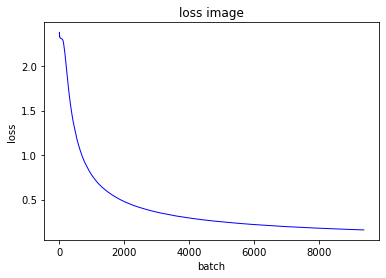

In [13]:
device="cuda" if torch.cuda.is_available() else "cpu"
net=net.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)
train(data_iter,net,optimizer,lr=0.001,loss_fn=loss_fn,max_epoch=10,device=device,batch_size=64)

In [14]:
torch.save(net,'LeNet.bin')

In [15]:
test_data=MinistData('D:/datasets/MNIST/raw/t10k-images-idx3-ubyte','D:/datasets/MNIST/raw/t10k-labels-idx1-ubyte')

In [16]:
def precise(data_iter,net,total,device):
    correct=0
    for (X,y) in data_iter:
        X,y=X.to(device),y.to(device)
        y_hat=net(X)
        y_pre=torch.argmax(y_hat,dim=1)
        correct+=(y_pre==y).sum().item()
    
    print(f"accuracy :{correct/total*100:>7f}")

In [17]:
test_iter=DataLoader(test_data,batch_size=64,shuffle=True)
precise(test_iter,net,len(test_data),device)

accuracy :98.610000
